## 第三章



* 第二章介绍了最为简单的深度学习网络：单层的线性神经网络，本质上这样的线性计算方式无法提供较为复杂的建模能力，但是一切复杂网络结构的基础，针对这类结构简单的线性网络，本章设计了两类任务：线性回归和softmax回归

### 3.1 线性回归

**回归**是能为一个或多个自变量与因变量之间关系建模的一类方法。深度学习所解决的很多问题都可以建模为回归类型，**线性回归**作为最为简单和流行的回归类型，有几个基础的假设：线性回归中自变量和因变量之间的关系是线性的；另外，线性回归中允许观测值中包含一些噪声，这些噪声都比较正常，例如遵循正态分布。  
书中给出的线性回归的例子是房价预测，此时因变量的房价会同时受到两个自变量房屋面积和房龄两个因素的影响，因此整体的数学模型可以表示为两个自变量的线性组合加上随机分布的噪声得到房价，如果将这个例子推广到高维情况，就可以得到线性回归的数学表达形式：  
$$
\hat{y} = \mathbf{w^T}\mathbf{x} + b
$$  
在这个式子中，x和y对应着单个数据样本的特征和观测值，即x的维度就是特征的个数，但在深度学习的场景中，需要通过多个数据样本学习线性回归的模型，因此将上面的公式改写为如下形式：  
$$
\mathbf{\hat{y}} = \mathbf{X}\mathbf{w} + b
$$  
在这个式子中的$\mathbf{X}$的每一行对应着一个数据样本，每一列对应着一个特征类型  
此时我们再次回顾线性回归的出发点，我们的目标是寻找和识别一个符合这个线性回归模型的模式，因此问题的关键变成了如何寻找公式中的**权重矩阵** ，根据之前学过的一些知识，我们自然的想到了通过真实数据集确定一个最接近真实的权重矩阵，在寻找这样的模型参数之前，还需要引入两个概念：一种衡量模型参数学习质量的方式；一种能够更新模型参数以提高模型预测质量的方法  
**损失函数**就是上面提到的模型质量的度量方式，针对特定的问题，需要设计符合当前问题的损失函数，通常将损失函数定义为数值越小损失越小，完美预测的损失为0。一种常见的损失函数就是平方损失函数：  
$$
L(\mathbf{w},b) = \frac{1}{n}\sum_{i=1}^{n}l^{(i)}(\mathbf{w},b) = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}(\mathbf{w}^T\mathbf{x}^{(i)} + b - y^{(i)})^2
$$  
上述公式中的$y^{(i)}$代表真实的标签数据，$\hat{y}^{(i)}$代表预测的标签数据，在上述loss计算中共计n个数据样本，均值的损失函数设计从某种程度上代表了模型在整个数据集上的预测质量，因此我们可以通过上述损失函数寻找最符合预期的模型参数，即：  
$$
\mathbf{w}^*, b^* = \argmin_{\mathbf{w},b} L(\mathbf{w},b)
$$  
d2l书在这里提到了解析解的概念，其实这里不了解也没关系，如果硬要说的话，就是线性回归这样一个任务有解析解的形式，解析解的形式建立在$X$有列满秩的性质，即在众多的数据样本中的各种特征的分布是不同的，这个概念是显然的，因为如果整理数据必然不可能会出现不同特征的表现相同的情况，因此完全可以通过最小二乘解的唯一形式写出线性回归的解析解，但其实在考虑引入噪声的情况下，线性回归大概率是不存在解析解的  
**优化策略**同样是学习最佳模型参数的一个重要层面，d2l在这里介绍的优化策略是最常见的一种优化算法——梯度下降、小批量随机梯度下降(minibatch stochastic gradient descent),这里我们选择和d2l书中不同的解释方式来说明这个优化算法的想法(不看公式)：在确定一个损失函数后，我们有一个很简单和很深刻的认知是：如果我们去计算损失函数关于这些模型参数的梯度，这个梯度的方向代表着在某一个优化位置的当前最佳优化方向(梯度向量的范数只能代表在单位变化下的函数变化情况)，



In [6]:
import time as Time
import torch
import numpy as np

class Timer:
    def __init__(self):
        self.time = []
        self.start()

    def start(self):
        self.step = Time.time()

    def stop(self):
        self.time.append(Time.time() - self.step)
        return self.time[-1]
    
    def sum(self):
        return sum(self.time)
    
    def mean(self):
        return sum(self.time) / len(self.time)
    
num = 1000000
a = torch.ones(num)
b = torch.ones(num)

c = torch.zeros(num)

timer_1 = Timer()

for i in range(num):   
    c[i] = a[i] + b[i] 

print(f"calculate time is {timer_1.stop():.10f}")

timer_1.start()

c = a + b

print(f"calculate time is {timer_1.stop():.10f}")


    

calculate time is 2.2785189152
calculate time is 0.0004022121


之后d2l又拿了一些篇幅说明了一下如何从极大似然估计的角度来理解最小二乘解的求解，其实就是为什么要设置l_2的损失函数，这部分是比较简单的

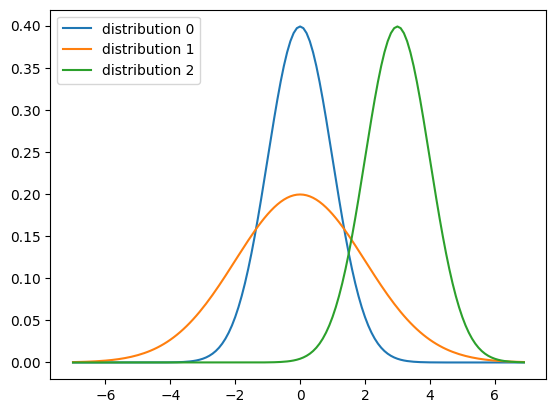

In [7]:
import math
from matplotlib import pyplot as plt

def normal_distribution(x,m,d):
    pre = 1 / np.sqrt(2 * math.pi * d ** 2)
    return pre * np.exp(-(1/2) * (x-m) ** 2 / d ** 2)

example = [[0,1],[0,2],[3,1]]

xspace = np.arange(-7,7,0.1)

fig,axe = plt.subplots()
for i in range(3):
    axe.plot(xspace,normal_distribution(xspace,example[i][0],example[i][1]),label = f"distribution {i}")
axe.legend()


接下来会开始从零实现线性回归的神经网络，总的步骤包括设置数据集，读取数据集，初始化模型参数，定义模型结构，定义损失函数，定义优化算法，在做完一切的准备工作之后，就可以直接训练得到结果了

我们在正式进入神经网络的编写前先了解一些预备知识：
在我们的后面内容中，我们会涉及到神经网络在特定的上下文环境中运行，以及以什么样的模式来运行网络，常见的例子就是with torch.no_grad():和model.train()、model.eval()
with torch.no_grad()常用于参数更新和推理阶段，它的作用是关闭梯度跟踪，在with torch.no_grad()上下文管理器下，PyTorch不会记录张量操作的计算图，也不会自动计算梯度，这样也能节省内存和计算资源，避免因保留不必要的中间变量而导致的内存占用：因此在参数更新的场景下，参数更新只是单纯的数值操作，我们并不想把他加入到计算图中；推理类似，我们只需要用，并不再需要进行复杂的计算和生成计算图，但这个场景下可以使用更加精确的：with torch.inference_mode():，因为这个上下文中还可以禁用一些内部机制
model.eval()通常会和with.torch.no_grad():一起使用，这说明现在的网络处于评估模式，model.eval()通常发生在normalization和dropout中，为什么会有评估模式的出现呢：可以想象这两个方法的应用场景，比如batch normalization在训练的时候是根据单个batch中的数据来计算均值方差的，但在测试时只能去计算训练时总的均值和方差来等效替代测试数据中的这两项，再比如dropout中，训练时会随机地舍弃部分结点，但推理的时候就直接使用了所有的网络结点，也就是说，实际上测试模式和model.train()的出现会为了切换模型的行为，他解决的是逻辑问题，但with torch.no_grad()解决的是当前的操作是否要加入计算图，是否占用计算资源，解决的是资源问题，与with torch.no_grad():对应的是with torch.enable_grad():
因此这两者还是有本质的差别，甚至在model.eval()中也可以with torch.enable_grad():

推理时建议使用with torch.inference_mode():


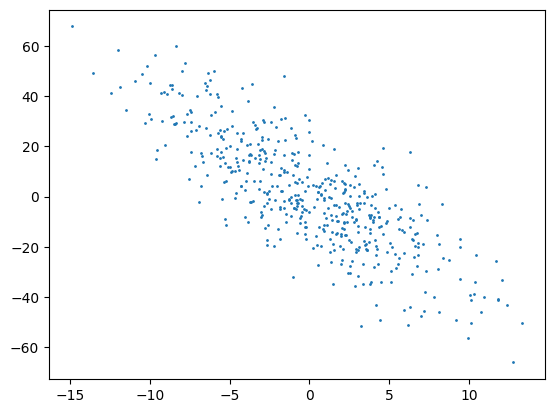

In [21]:
def synthtic_data(weight,bias,data_len):
    x = torch.normal(0,5,(data_len,len(weight)))
    y = torch.mv(x,weight) + bias
    y += torch.normal(0,1,(y.shape))
    return x,y.reshape(-1,1)

w = torch.tensor([2.5,-3.4])
b = torch.tensor(1)
data_len = 500

feature,label = synthtic_data(w,b,data_len)

plt.scatter(feature[:,1],label,s=1)

在写读取数据的函数之前，需要引入一定的python基础知识，python的语法中有一个很实用的东西：迭代器和生成器，生成器可以看成是一个定义生成器的函数+一个迭代使用的场景，本质上和迭代器没有太大的差别，yield会不断产生需要的迭代元素完成输出任务，在读取数据的场景中，数据集需要按照batch_size进行批量大小的输出，并且在单次迭代过程中是“要一点给一点”，这就完美符合生成器的特性,下面给一个示例代码展示生成器：

In [9]:
def read_number(num_list):
    try:
        for part in num_list:
            for part_inside in read_number(part):
                yield part_inside
    except TypeError:
        yield num_list

nested_list = [1, [2, [3, 4], 5], [6, 7], 8]

for content in read_number(nested_list):
    print(content)

'''这个例子中使用了递归和生成器 最终也是想说明一件事 他可以按照我们的需求进行随取随停'''
    


1
2
3
4
5
6
7
8


'这个例子中使用了递归和生成器 最终也是想说明一件事 他可以按照我们的需求进行随取随停'

In [22]:
import random

def data_iter(batch_size,features,labels):
    total_num = len(features)
    rank = torch.arange(total_num)
    random.shuffle(rank)

    for i in range(0,total_num,batch_size):
        select_part = torch.arange(i,min(i+batch_size,total_num))
        yield features[rank[select_part]],labels[rank[select_part]]
    
for x,y in data_iter(10,feature,label):
    print(x)
    print(y)
    break


tensor([[-6.8514, -3.6649],
        [-6.8514, -3.6649],
        [ 2.4225, -1.3884],
        [-6.8514, -3.6649],
        [ 4.5759, -4.8484],
        [-1.4693,  0.9054],
        [-5.6717, -2.3983],
        [-4.2401,  5.4154],
        [ 2.4225, -1.3884],
        [-1.4693,  0.9054]])
tensor([[ -2.0363],
        [ -2.0363],
        [  9.9762],
        [ -2.0363],
        [ 27.9778],
        [ -6.3348],
        [ -5.0970],
        [-28.2437],
        [  9.9762],
        [ -6.3348]])


In [ ]:
init_w = torch.tensor([1.0,1.0],requires_grad = True) #在定义tensor的内容时使用浮点数
init_b = torch.ones((),requires_grad=True)

def loss(y_hat,y):
    return (y_hat.reshape(y.shape) - y) ** 2 / 2 #一定不要把形状搞错了 这就是广播机制需要熟悉的原因

def net(x,w,b):
    return torch.mv(x,w) + b

def sgd(paras,lr,batch_size):
    with torch.no_grad():
        for para in paras:
            para -= lr * para.grad / batch_size
            para.grad.zero_()


In [34]:
iterations = 10
lr = 0.01
batch_size = 10
# 数据集中有500组数据
# 真实的w和b的大小为[2.5，-3.4]、1

for i in range(iterations):
    for x,y in data_iter(batch_size,feature,label):
        l = loss(net(x,init_w,init_b),y)
        l.sum().backward() #最后一步得化成标量
        sgd([init_w,init_b],lr,batch_size)
    with torch.no_grad():
        loss_eval = loss(net(feature,init_w,init_b),label)
        print(f"iteration is {i+1}",init_w,init_b,f"loss is {torch.mean(loss_eval)}")


iteration is 1 tensor([ 2.5177, -3.3797], requires_grad=True) tensor(1.1686, requires_grad=True) loss is 0.5577819347381592
iteration is 2 tensor([ 2.5110, -3.4149], requires_grad=True) tensor(1.1062, requires_grad=True) loss is 0.5545547604560852
iteration is 3 tensor([ 2.4789, -3.4254], requires_grad=True) tensor(1.0484, requires_grad=True) loss is 0.5611150860786438
iteration is 4 tensor([ 2.5529, -3.3691], requires_grad=True) tensor(1.0025, requires_grad=True) loss is 0.5770998001098633
iteration is 5 tensor([ 2.5374, -3.3464], requires_grad=True) tensor(0.9931, requires_grad=True) loss is 0.5746312141418457
iteration is 6 tensor([ 2.5191, -3.4204], requires_grad=True) tensor(1.0238, requires_grad=True) loss is 0.5554414987564087
iteration is 7 tensor([ 2.5131, -3.4073], requires_grad=True) tensor(1.0230, requires_grad=True) loss is 0.5439419150352478
iteration is 8 tensor([ 2.5142, -3.3458], requires_grad=True) tensor(0.9512, requires_grad=True) loss is 0.5624077320098877
iteratio

在手动写了所有的网络组件后，实际上没有必要每次都自己写这些组件，现有的深度学习框架已经很好地将这些功能封装了起来，回想一下我们之前实现一个简单的线性回归网络包括了哪些步骤：定义(找到数据集)、做一个数据集读取器、网络内容定义、损失函数定义、训练器定义和网络训练的代码，这些部分中有一些还是要像之前那样写的，但是网络的组件都可以通过调用现成的模块来实现
开始之前提示一下从头写线性回归网络的注意点，因为在调用现成的模块快速实现网络构建时通常会省略这些容易出错的地方，需要自己注意：
* backward()之前loss一定要是一个标量
* 注意predicition数据和本身的label数据的形状要一致，否则广播机制会造成错误
* 在评估的部分和参数更新的时候需要with torch.no_grad():定义一个不需要计算图的环境

In [ ]:
import torch
from torch.utils import data
import torch.nn as nn

def syn_data(w,b,data_len):
    x = torch.normal(0,1,(data_len,len(w)))
    y = torch.mv(x,w) + b
    y -= torch.normal(0,0.01,y.shape)
    return x,y.reshape(-1,1)

true_w = torch.tensor([3.5,-2.4])
true_b = torch.tensor(-2.3)
data_len = 500

features,labels = syn_data(true_w,true_b,data_len)

def array_list(origin_data,batch_size,is_train):
    dataset = data.TensorDataset(*origin_data)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

lr = 0.01
batch_size = 10
num_epoch = 10
is_train = True
net = nn.Sequential(nn.Linear(2,1))
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(),lr)

net[0].weight.data.normal_(0,1)
net[0].bias.data.fill_(0)

for i in range(num_epoch):
    for x,y in array_list((features,labels),batch_size,is_train):
        trainer.zero_grad()
        l = loss(net(x),y)
        l.backward()
        trainer.step()
    with torch.no_grad():
        loss_total = loss(net(features),labels)
        print(f"epoch{i+1}:"+f"the loss is {loss_total:.5f}")




epoch1:the loss is 3.02561
epoch2:the loss is 0.40678
epoch3:the loss is 0.05637
epoch4:the loss is 0.00807
epoch5:the loss is 0.00124
epoch6:the loss is 0.00027
epoch7:the loss is 0.00012
epoch8:the loss is 0.00010
epoch9:the loss is 0.00010
epoch10:the loss is 0.00010


从线性回归过渡到softmax回归，其中一个最大的区别就是输出的不同，在线性回归的例子当中，无论输入数据的维度如何，最终只输出一个符合线性计算的标量，也即一个值；但softmax不一样，网络会输出多个值，每个值对应分类的概率，因此当面对选择分类种类的问题时，将问题可以转换为多个输出值的网络，通过比较多个输出值的大小来确定最终输出的类别

在开始之前，需要一定的信息论的知识，如果在这里有一定的理解难度需要自己去看一些信息论的入门书籍，比如为什么我们会定义熵，理论上来说熵是衡量一件事的信息量的单位，也是存储某个信息的最小存储长度，在后面的定义中，对数的底数被限制在2
如果使用多个输出来确定最终的分类目标，我们必须解决两个问题，一个是输出的值不受控制，他并不一定是符合概率分布的0-1之间的值，另一个是在分类任务中我们应该使用什么样的损失函数来训练网络
前面的这个问题可以由softmax解决，softmax的作用就是将一个处在大范围变动的值映射到0-1之间的概率，既然网络最终输出的是概率值，最终就能直接通过比较概率的大小来确定最终的分类输出结果
第二个问题其实和第一个问题是相关的，在最终的输出经过一次softmax变换之后，等价于最终我们应该训练的是概率最接近于真实分类尽可能大、错误分类的概率尽可能小的情况，也就是说：我们最终希望去拟合一个分布，这时信息论的知识就再次出场了，我们希望衡量真实分布和训练分布的差距，就想到了一个工具：交叉熵(cross entropy),交叉熵和相对熵这两个概念都实际上说明了两个概率分布的接近程度；在这里值得多说一句的是，可以从相对熵的角度来推导交叉熵，也就可以理解为什么真实分布在算概率的部分，训练分布在算对数的部分了，从原理上理解的话：训练分布希望靠近真实分布，不能把因果关系搞错了
d2l中在这一节值得阅读的部分在109页的softmax导数部分，为什么要使用指数归一化的方式处理概率，在这里就有很好的说明，求导数能本质上说明训练交叉熵就是在希望softmax后的结果接近真实分布

60000 10000
torch.Size([1, 28, 28])
torch.Size([12, 1, 28, 28])


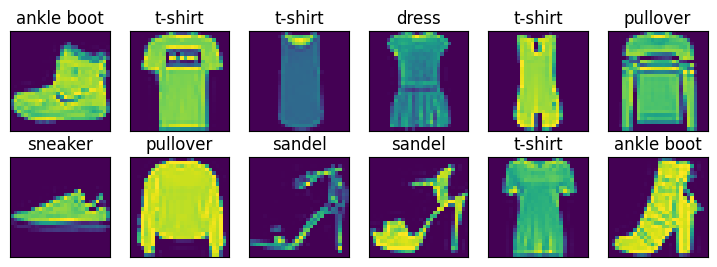

In [12]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from matplotlib import pyplot as plt

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root = "../data",train = True,transform=trans,download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,download=True,transform=trans)

print(len(mnist_train),len(mnist_test))
print(mnist_train[0][0].shape) #第一个维度指定feature,第二个维度指定第几个

def show_labels(labels):
    name_labels = ['t-shirt','trousers','pullover','dress','coat','sandel','shirt','sneaker','bag','ankle boot']
    return [name_labels[int(i)] for i in labels] # 要写int 不然不能正确索引

def show_images(images,num_rows,num_cols,scale=1.5,labels=None):
    figure_size = [num_cols*scale,num_rows*scale]
    _,axes = plt.subplots(nrows=num_rows,ncols=num_cols,figsize=figure_size)
    axes = axes.flatten()
    for i,(axe,image) in enumerate(zip(axes,images)):
        if torch.is_tensor(image):
            axe.imshow(image.numpy())
        else:
            axe.imshow(image)
        axe.axes.get_xaxis().set_visible(False)
        axe.axes.get_yaxis().set_visible(False)
        if labels:
            axe.set_title(labels[i])

X,y = next(iter(data.DataLoader(mnist_train,batch_size=12)))
print(X.shape) # 12*1*28*28
show_images(X.squeeze(),num_rows=2,num_cols=6,labels=show_labels(y))

reshape的规则说一下